# Analyse of PCRD data from Ballon LET FIK 

In [1]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sy

from scipy.optimize import curve_fit

import pandas as pd  # data parsing library
from matplotlib import cm, colors

sys.path.append('./aerocalc')
import std_atm as sa

#import cartopy.crs as ccrs  # maps plotting library
#from cartopy.io.img_tiles import GoogleTiles
#from cartopy.io.img_tiles import OSM
#from cartopy.io.srtm import srtm_composite

#from osgeo import gdal
#from osgeo import gdal_array

Populating the interactive namespace from numpy and matplotlib


## Parsing input data files and standard atmosphere correction

records = 2124
records2 = 1005


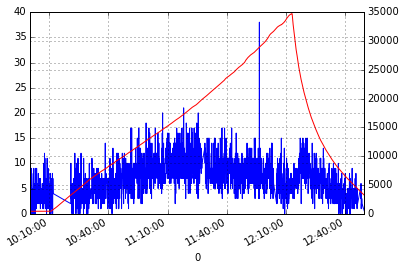

In [150]:
# Dose
filepath = './pcrd_corrected.csv'
#plt.title('')
df = pd.read_csv(filepath,sep=' ', header=None )

records = len(df)
print "records =",records

#for col in range(10,4048):
#    df[col]=df[col].rmul((col-10))
df[2] = 0
df[3] = 0
df[4] = 0
df[5] = 0

for col in range(6,4048):
    df[2]+=df[col]
    df[3]+=df[col]*col

for col in range(20,40):
    df[4]+=df[col]
for col in range(41,4048):
    df[5]+=df[col]
#df[9]

df[0] = pd.to_datetime(df[0],unit='s')
df = df.set_index(0)
df = df.sort_index()

df[2].plot()

# Height
filepath = '../1-alt-and-time/data_final.csv'
df2 = pd.read_csv(filepath,sep=' ', header=0)

records = len(df2)
print "records2 =",records
#print df2

df2['RTC_Corrected'] = pd.to_datetime(df2['RTC_Corrected'],unit='s')

plt.twinx()
#df2 = df2.dropna()
for line in range(0,len(df2)):
    df2.loc[line,'Alt_Alt'] = sa.press2alt(df2.loc[line,'Pressure'], press_units = 'pa', alt_units = 'm')

df2 = df2.set_index('RTC_Corrected')
df2 = df2.sort_index()
df2['Alt_Alt'].plot(color='red')


## Resampe and join data

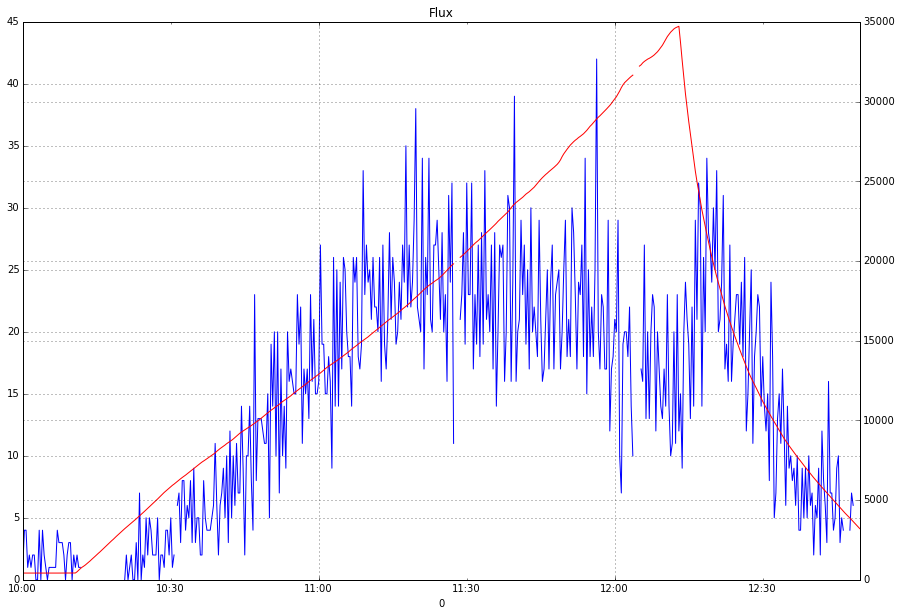

In [131]:
plt.figure(figsize=(15, 10))
plt.title('Flux')

step = '20S'

#df[2].plot(color='yellow')
df3 = df.resample(step, how='sum', base=0)

#plt.ylim([0,6000])
#plt.ylim([0,20])
#plt.yscale('logit')
#plt.set_yscale('logit')
df3[5].plot()

plt.twinx()

#plt.ylim([0,13000])
df4 = df2.resample(step, how='mean', base=0)

df4['Alt_Alt'].plot(color='red')

df3[2]=df4['Alt_Alt']

In [ ]:
df3 = df3.dropna() # drop NaN values
df3 = df3.set_index(2)
df3 = df3.sort_index()

In [ ]:
plt.plot(df3[2],df3[5])

## Agregate data

In [135]:
df3 = df3.dropna()
#df3 = df3.sort(2)
df3 = df3.reset_index()
alt_step = 2000
for line in range(0,len(df3)):
    df3.loc[line,2] = round(df3.loc[line,2]/alt_step)*alt_step
bins = np.arange(400,40000,alt_step)
ind = np.digitize(df3[2],bins)
#df3.groupby(ind).head()

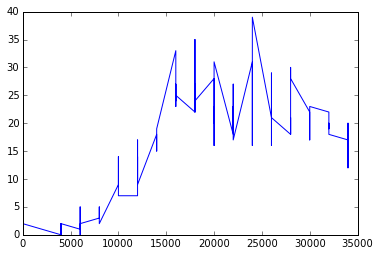

In [136]:
df6 = df3.groupby(ind).head()
df6 = df6.sort(2)
#df6 = df6.set_index(2)
#df6 = df6.sort_index()
plt.plot(df6[2],df6[5])

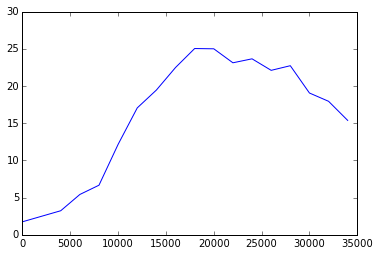

In [137]:
gr = df3.groupby(ind).mean()
plt.plot(gr[2],gr[5])

In [138]:
hystogram = pd.DataFrame()
step = 10
for col in range(10,7000,step):
    hystogram[col/step] = gr.loc[:,col:col+step].sum(axis=1)


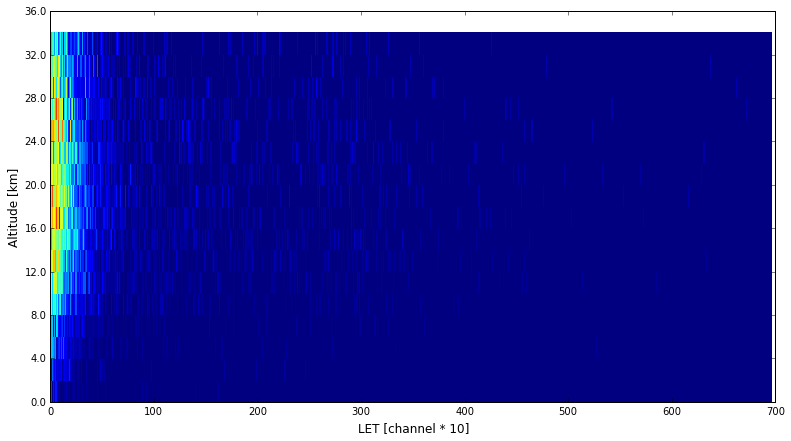

In [148]:
ax = figure(figsize=(13, 7)).add_subplot(111)
#plt.figure(figsize=(13, 7))
plt.pcolor(hystogram.loc[:17,4:699])
plt.ylabel('Altitude [km]',fontsize=12)
plt.xlabel('LET [channel * 10]',fontsize=12)
ticks = ax.get_yticks().tolist()
for tick in range(0,len(ticks)):
    ticks[tick] = ticks[tick] * 2
ax.set_yticklabels(ticks)


## Noise separation

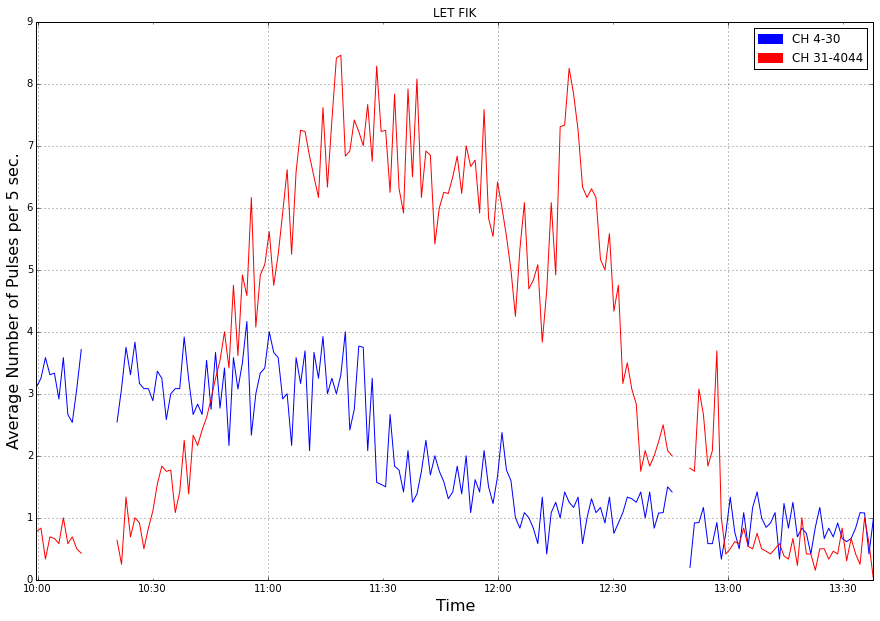

In [152]:
plt.figure(figsize=(15, 10))
plt.title('LET FIK')

step = '70S'

df[4] = 0
df[5] = 0
for col in range(7,34):
    df[4]+=df[col]
for col in range(35,4048):
    df[5]+=df[col]


#df[2].plot(color='yellow')
df3 = df.resample(step, how='mean', base=0)

#plt.ylim([0,6000])
#plt.ylim([0,20])
#plt.yscale('logit')
#plt.set_yscale('logit')
df3[4].plot(color='blue')

#plt.twinx()

df3[5].plot(color='red')

#plt.ylabel('Number of measurements',color='green', fontsize=16)
plt.ylabel('Average Number of Pulses per 5 sec.', fontsize=16)
plt.xlabel('Time',fontsize=16)
#plt.tick_params(axis='y', colors='blue', labelsize=16)

patch1 = matplotlib.patches.Patch(color='blue', label='CH 4-30')
patch2 = matplotlib.patches.Patch(color='red', label='CH 31-4044')
plt.legend(handles=[patch1,patch2])


In [155]:
#datetime.timedelta(days=1)
from_time = str(pd.to_datetime('10:30:00'))
to_time = str(pd.to_datetime('12:30:00'))
#to_time = str(pd.to_datetime(FD) + datetime.timedelta(days=days_view))
df5 = df.loc[from_time:to_time,7:500]


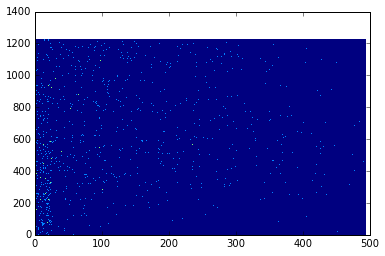

In [156]:
#plt.figure(figsize=(15, 10))

plt.pcolor(df5)

df2

records = 2124


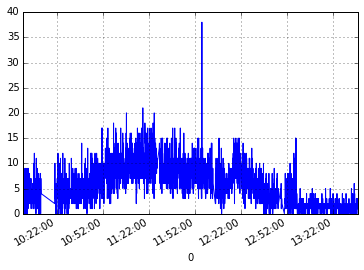

In [157]:
# parsing input data file

# Dose
filepath = './pcrd_corrected.csv'
#filepath = './pcrd_final.csv'
#filepath = './data_pcrd.csv'
#plt.title('')
df = pd.read_csv(filepath,sep=' ', header=None )

records = len(df)
print "records =",records

#for col in range(10,4048):
#    df[col]=df[col].rmul((col-10))
df[2] = 0
df[3] = 0
df[4] = 0
df[5] = 0

for col in range(6,4048):
    df[2]+=df[col]
    df[3]+=df[col]*col

for col in range(20,40):
    df[4]+=df[col]
for col in range(41,4048):
    df[5]+=df[col]
#df[9]

df[0] = pd.to_datetime(df[0],unit='s')
df = df.set_index(0)
df = df.sort_index()

df[2].plot()



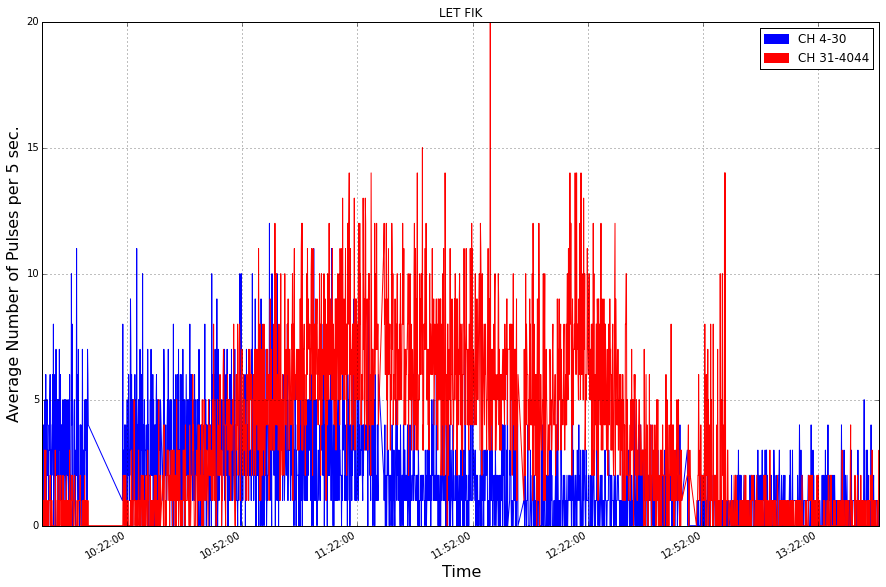

In [158]:
plt.figure(figsize=(15, 10))
plt.title('LET FIK')

step = '70S'

df[4] = 0
df[5] = 0
for col in range(7,34):
    df[4]+=df[col]
for col in range(35,4048):
    df[5]+=df[col]


#df[2].plot(color='yellow')
#df3 = df.resample(step, how='mean', base=0)

#plt.ylim([0,6000])
plt.ylim([0,20])
#plt.yscale('logit')
#plt.set_yscale('logit')
df[4].plot(color='blue')

#plt.twinx()

df[5].plot(color='red')

#plt.ylabel('Number of measurements',color='green', fontsize=16)
plt.ylabel('Average Number of Pulses per 5 sec.', fontsize=16)
plt.xlabel('Time',fontsize=16)
#plt.tick_params(axis='y', colors='blue', labelsize=16)

patch1 = matplotlib.patches.Patch(color='blue', label='CH 4-30')
patch2 = matplotlib.patches.Patch(color='red', label='CH 31-4044')
plt.legend(handles=[patch1,patch2])


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


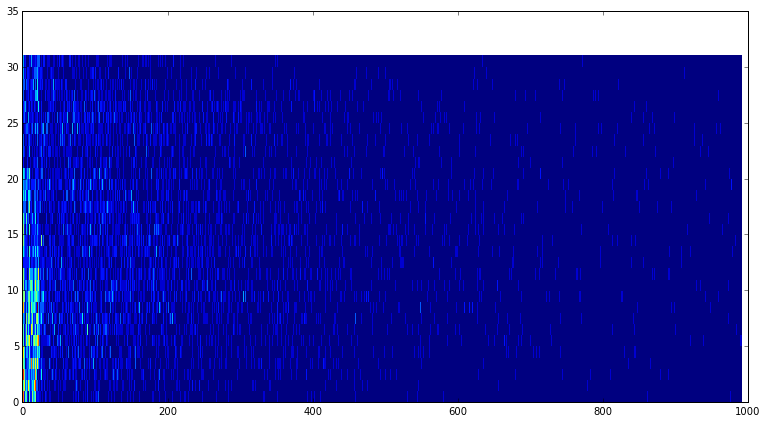

In [159]:
#%pylab qt
%pylab inline

plt.figure(figsize=(13, 7))

df3 = df.resample('4MIN', how='sum', base=0)

#datetime.timedelta(days=1)
from_time = str(pd.to_datetime('2015-12-31 10:40:00'))
to_time = str(pd.to_datetime('2015-12-31 12:40:00'))
#to_time = str(pd.to_datetime(FD) + datetime.timedelta(days=days_view))
df5 = df3.loc[from_time:to_time,10:1000]
plt.pcolor(df5)

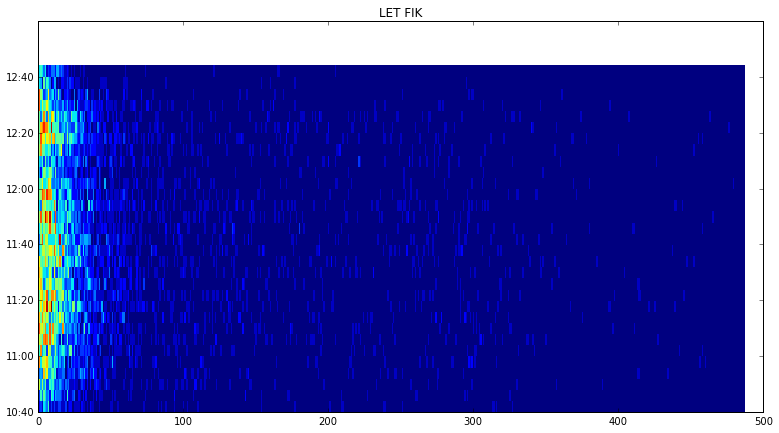

In [160]:
df6 = pd.DataFrame()
step = 10
for col in range(10,5000,step):
    df6[col/step] = df3.loc[:,col:col+step].sum(axis=1)
    
#plt.figure(figsize=(13, 7))
ax = figure(figsize=(13, 7)).add_subplot(111)
#>>> a=axes.get_xticks().tolist()

plt.pcolor(df6.loc[from_time:to_time,4:490])
#ax.set_yticks([0,5,10,15,20,25,30])
ax.set_yticklabels(['10:40','11:00','11:20','11:40','12:00','12:20','12:40'])
plt.title('LET FIK')